**Mark Galperin - HW0** <br>
ME314 9/23/20 <br> 

**Problem 1** <br>
Given a function f(x) = sin(x), find the derivative of f(x) and find the directional derivative of f(x) in the direction v. Moreover, compute these derivatives using Pythons’s SymPy package

In [1]:
#imports...
import sympy as sym 
from sympy import symbols, integrate
import numpy as np  
import matplotlib.pyplot as plt
import math

_Defining and taking the derivative of f(x)_

In [2]:
#defining symbols...
x = symbols('x')

#define the function...
f = sym.sin(x)
f

sin(x)

In [3]:
#taking the derivative...
df = f.diff(x)
print('The derivative of f is:',df)

The derivative of f is: cos(x)


_Taking the directional derivative of f(x)_

In [4]:
#defining the scalar epsilon and the direction vector v...
eps, v = symbols(r'\epsilon, v')

#defining the local approximation of f...
f_new = sym.sin(x + v*eps)

In [5]:
#taking the directional derivative with respect to epsilon...
df_eps = f_new.diff(eps)

#output...
print('The derivative of f with respect to epsilon is:')
display(df_eps)

The derivative of f with respect to epsilon is:


v*cos(\epsilon*v + x)

In [6]:
#evaluating for epsilon = 0...
df_dir = df_eps.subs(eps,0)

#output...
print('The directional derivative of f on v is:')
display(df_dir)

The directional derivative of f on v is:


v*cos(x)

**Problem 2** <br>
Given a function of trajectory: <br>
$J(x(t)) = \int_{0}^{\pi /2} \frac{1}{2}x(t)^{2}dt$ <br>
Compute the analytical solution when x = cos(t), verify your answer by numerical integration.

In [7]:
#defining the euler method integration function...
def euler(func, xspan, step_size):
    #x is a linear range between the integral limits
    x = np.arange(xspan[0], xspan[1], step_size) 
    
    #initial value = 0
    int_val = 0 
    
    #Euler method...
    for xi in x: int_val += func(xi) * step_size
    
    return int_val

In [8]:
#define the integrand (x(t))^2/2, where x = cos(t)
def integrand_p2(t):
    return ((math.cos(t))**2)/2

In [9]:
#Evaluating the integral of the functional J(x(t))
xspan = [0,math.pi/2]
step_size = 0.001

J = euler(integrand_p2,xspan, step_size)
print('the numerical solution is J(x(t)) = ',J)

the numerical solution is J(x(t)) =  0.3929490817067343


In [10]:
#checking that the answer is equal to pi/8...
math.pi / 8

0.39269908169872414

**Problem 3** <br>
For the function J(x(t)) in Problem 2, compute and evaluate the analytical solution for the directional derivative of J at x(t) = cos(t), in the direction v(t) = sin(t).

P3 does not require this notebook.

**Problem 4** <br>
Verify your answer in Problem 3 using the same numerical integration method you used in Problem 2, also verify the answer using the symbolic integrator in Python’s SymPy package.

_Pt 1 - numerical integration_

In [11]:
# the integration in this problem, with epsilon factored out, is composed of three integrations 
# (as shown in the starred line of math in the handwritten part)

def integrand_p4_1(t):
    return math.sin(t)**2

def integrand_p4_2(t):
    return math.sin(t)*math.cos(t)

def integrand_p4_3(t):
    return 1/2

In [12]:
#span and step size...
xspan = [0,math.pi/2]
step_size = 0.001

#evaluating...
I1 = euler(integrand_p4_1,xspan, step_size)
I2 = euler(integrand_p4_2,xspan, step_size)
I3 = euler(integrand_p4_3,xspan, step_size)

In [13]:
#here I'll use symbolic math to evaluate the derivative, plugging in the values I've integrated...
J_eps = ((eps**2-1)/2)*I1 + (eps)*I2 + I3

#taking the derivative with respect to epsilon...
dJ_eps = J_eps.diff(eps)

#substituing epsilon = 0...
J_dir = dJ_eps.subs(eps,0)

In [14]:
print('the numerical solution for the directional derivative is DJ(x(t))*v = ',J_dir)

the numerical solution for the directional derivative is DJ(x(t))*v =  0.499999914428542


_Pt 2 - Symbolic integration_

In [15]:
#variable and function definition...
t = symbols(r't') 
eps, v = symbols(r'\epsilon, v')

Jsym_integrand = (sym.cos(t)+eps*sym.sin(t))**2/2

In [16]:
#define bounds...
t0 = 0
tf = sym.pi/2

#integrate...
Jsym_eps = integrate(Jsym_integrand, (t, t0, tf)) 
print('integration of J from t=0 to pi/2: ') 
display(Jsym_eps)

integration of J from t=0 to pi/2: 


pi*\epsilon**2/8 + \epsilon/2 + pi/8

In [17]:
#deriving with respect to epsilon....
dJsym_eps = Jsym_eps.diff(eps)

#setting epsilon to zero...
Jsym_dir = dJsym_eps.subs(eps,0)

print('Fully evaluated directional derivative of J: ') 
display(Jsym_dir)

Fully evaluated directional derivative of J: 


1/2

**Problem 5** <br>
Given the equation... <br>
$xy + \sin(x) = x + y$ <br>
Use Python’s SymPy package to symbolically solve this equation for y, thus you can write y as a function of x. Transfer your symbolic solution into a numerical function and plot this function for x ∈ [0, π] with Python’s Matplotlib package. <br>
In this problem you will use two methods in SymPy. The first is its symbolic sovler method solve(), which takes in an equation or expression (in this it equals 0) and solve it for one or one set of variables. Another method you will use is lambdify(), which can transfer a symbolic expression into a numerical function automatically (of course in this problem we can hand code the function, but later in the class we will have super sophisticated expression to evaluate

In [18]:
x = sym.symbols('x')
y = sym.symbols('y')

# define an equation 
eqn = sym.Eq(x*y + sym.sin(x), x + y) 
print('original equation') 
display(eqn)

original equation


Eq(x*y + sin(x), x + y)

In [19]:
# solve this equation for y 
y_sol = sym.solve(eqn, y)   # this method returns a list, 
                            # which may include multiple solutions
print('symbolic solutions: ')
for soln in y_sol:
    display(soln)

symbolic solutions: 


(x - sin(x))/(x - 1)

In [20]:
y_expr = y_sol[0] # in this case we just have one solution

# lambdify the expression wrt symbol x 
func = sym.lambdify(x, y_expr) 
print('Test: func(pi/4) = ', func(np.pi/4))

Test: func(pi/4) =  -0.3648215851754261


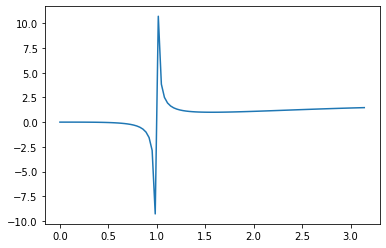

In [21]:
# plotting from 0 to pi...
# generate list of values from 0 to pi 
x_list = np.linspace(0, np.pi, 100)

# evaluate function at those values 
f_list = func(x_list)

# plot it
plt.plot(x_list, f_list) 
plt.show()